### Importing Relevant Libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Import CSV file

In [2]:
#import file
data=pd.read_csv('/Users/kabel/Dropbox/Mac/Downloads/mhs.csv')


### Exploratory Data Analysis

In [3]:
#checking columns
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [4]:
#checking sample data
data.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

In [5]:

# Instantiate LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the RiskLevel column to numerical values
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])


In [6]:
#checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


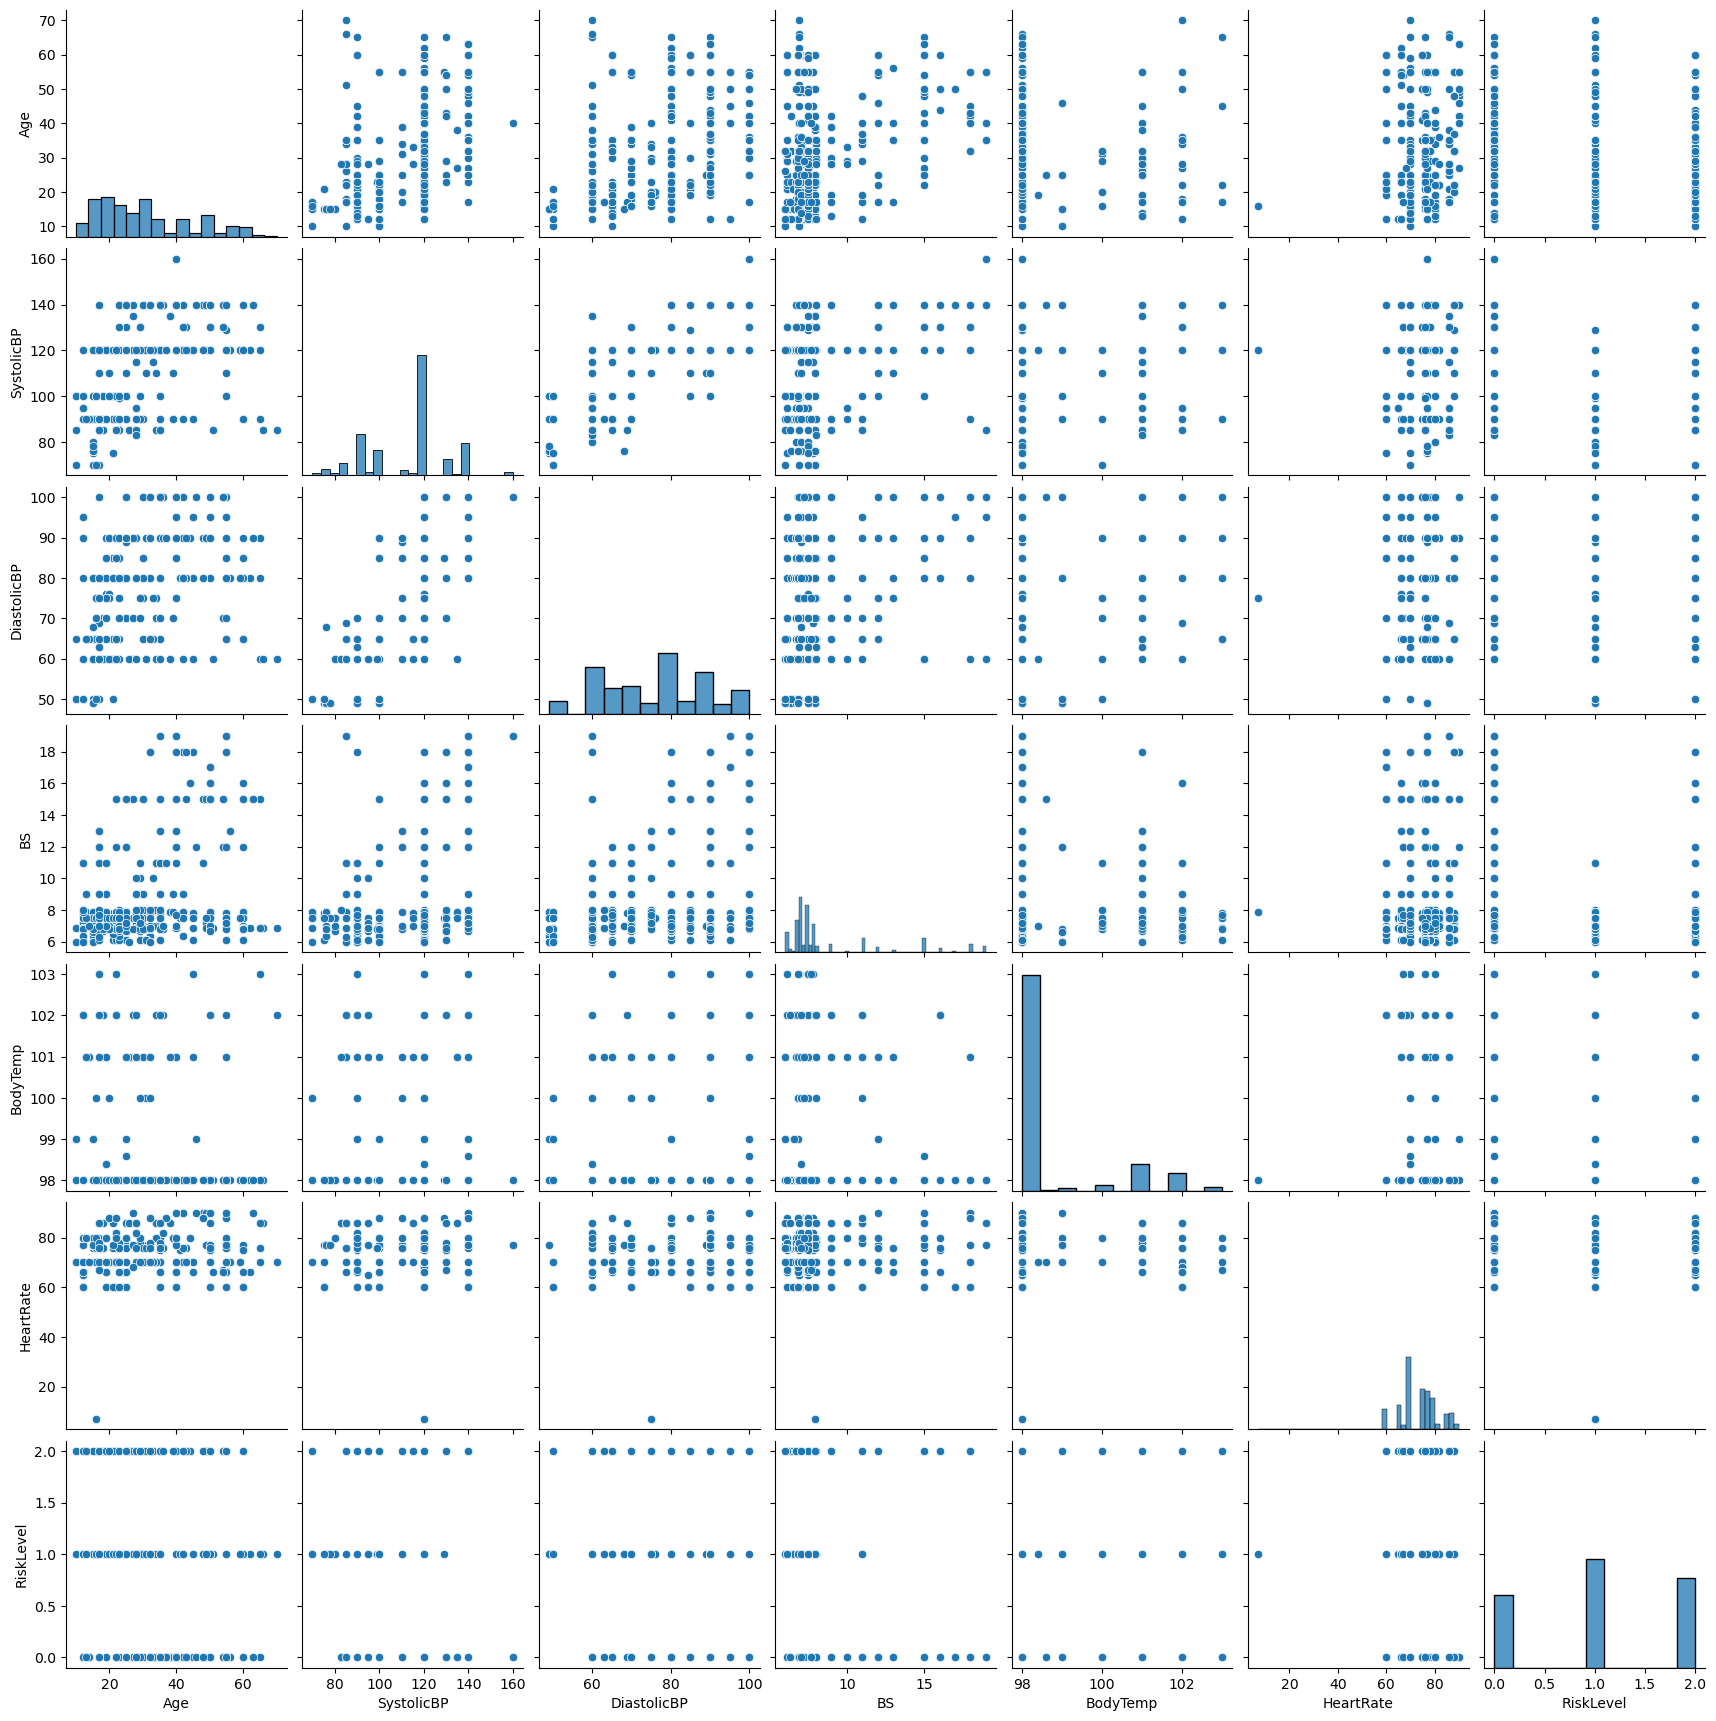

In [7]:
#checking pairplot
sns.pairplot(data)

In [8]:
#checking for na in data sample
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
# select the columns for which to calculate the correlation coefficient
columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']
selected_data = data[columns]

# calculate the correlation coefficient
corr_matrix = selected_data.corr()

# print the correlation matrix
print(corr_matrix)

                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798   
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108   
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151   
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867   
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771   
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000   
RiskLevel   -0.211851   -0.208797    -0.284633 -0.479958 -0.006680  -0.111637   

             RiskLevel  
Age          -0.211851  
SystolicBP   -0.208797  
DiastolicBP  -0.284633  
BS           -0.479958  
BodyTemp     -0.006680  
HeartRate    -0.111637  
RiskLevel     1.000000  


In [10]:
data.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86          0
1   35         140           90  13.0      98.0         70          0
2   29          90           70   8.0     100.0         80          0
3   30         140           85   7.0      98.0         70          0
4   35         120           60   6.1      98.0         76          1

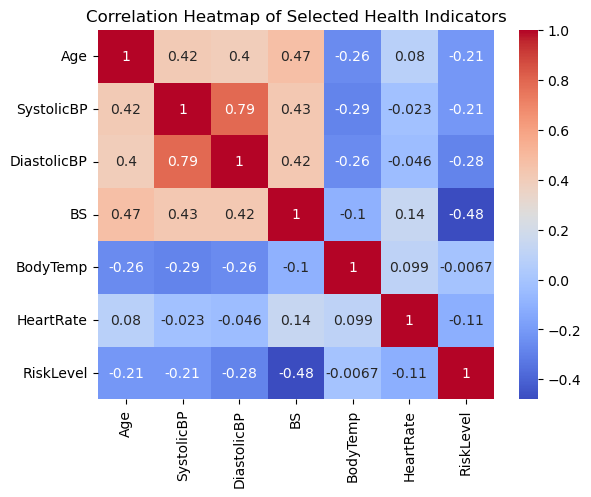

<Figure size 640x480 with 0 Axes>

In [11]:
# Select columns to include in the heatmap
cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']

# Create heatmap
sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap of Selected Health Indicators')

# Show the plot
plt.show()
plt.savefig('Heatmap.png')

In [12]:
#checking for statistical summary
data.describe()

Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate    RiskLevel  
count  1014.000000  1014.000000  
mean     74.301775     1.063116  
std       8.088702     0.772146  
min       7.000000     0.000000  
25%      70.000000     0.000000  
50%      76.000000     1.000000  
75%      80.000000     2.000000  
max      90.000000     2.000000

In [13]:
# replace the HeartRate value of 7 with a value of 60
data.loc[data['HeartRate'] == 7, 'HeartRate'] = 60

# save the updated data to a new file
data.to_csv('updated_patient_data.csv', index=False)

In [14]:
#revalidating statistical change in data
data.describe()

Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate    RiskLevel  
count  1014.000000  1014.000000  
mean     74.406312     1.063116  
std       7.541697     0.772146  
min      60.000000     0.000000  
25%      70.000000     0.000000  
50%      76.000000     1.000000  
75%      80.000000     2.000000  
max      90.000000     2.000000

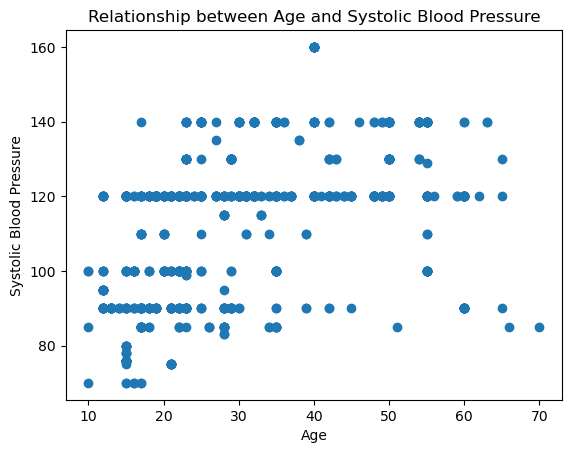

<Figure size 640x480 with 0 Axes>

In [15]:
# Create a scatter plot of age vs. systolic blood pressure
plt.scatter(data['Age'], data['SystolicBP'])

# Add labels and title to the plot
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.title("Relationship between Age and Systolic Blood Pressure")

# Show the plot
plt.show()
plt.savefig('Age_systolic.png')

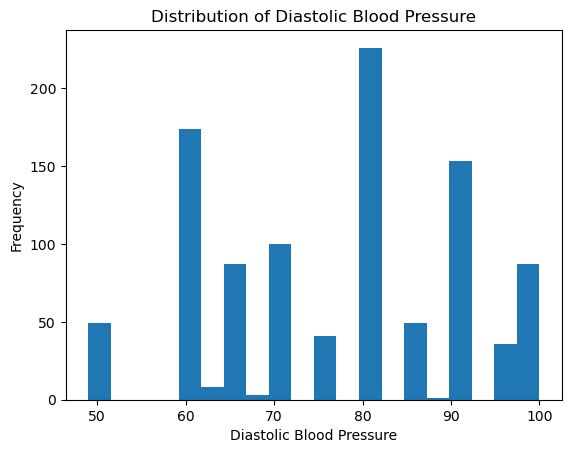

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot histogram of DiastolicBP
plt.hist(data['DiastolicBP'], bins=20)
plt.title('Distribution of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Diastolic.png')


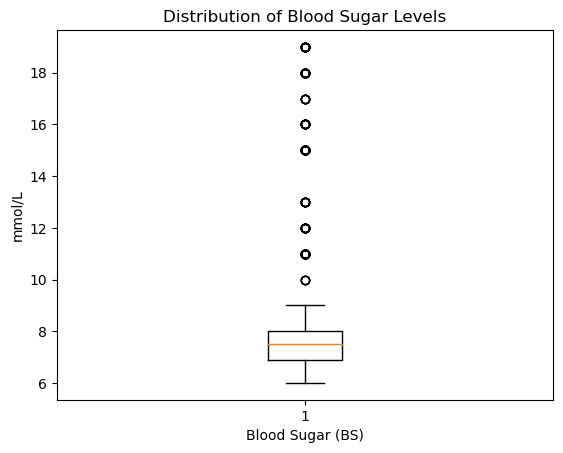

<Figure size 640x480 with 0 Axes>

In [17]:
# Create a boxplot for BS column
plt.boxplot(data['BS'])

# Add title and axis labels
plt.title('Distribution of Blood Sugar Levels')
plt.xlabel('Blood Sugar (BS)')
plt.ylabel('mmol/L')

# Show the plot
plt.show()

plt.savefig('BSL.png')

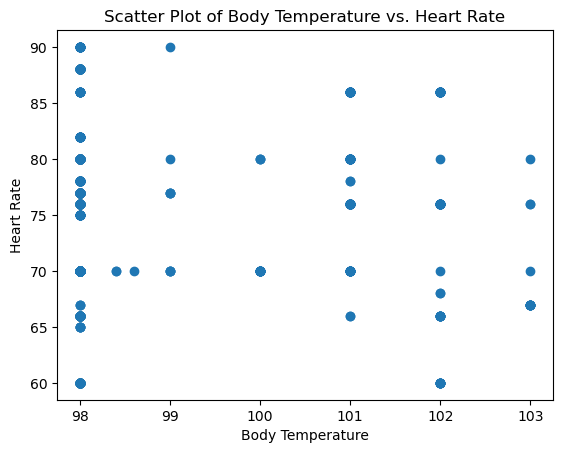

<Figure size 640x480 with 0 Axes>

In [18]:
# Create a scatter plot of BodyTemp vs. HeartRate
plt.scatter(data['BodyTemp'], data['HeartRate'])

# Add axis labels and a title
plt.xlabel('Body Temperature')
plt.ylabel('Heart Rate')
plt.title('Scatter Plot of Body Temperature vs. Heart Rate')

# Display the plot
plt.show()
plt.savefig('temp_heartrate.png')

### Question 1

To build a linear model with Systolic BP as the response variable, we need to select one or more exploratory variables that may potentially have a relationship with Systolic BP. Based on the correlation matrix provided earlier, we can see that the variables that have the highest correlation with Systolic BP are Diastolic BP (0.79), Age (0.42), and BS (0.43).

Therefore, we can build a linear model with Systolic BP as the response variable and Age, Diastolic BP, and BS as the exploratory variables. We can hypothesize that these variables may have a linear relationship with Systolic BP. For example, as a woman ages, her Systolic BP may increase due to changes in arterial stiffness and other physiological factors. Similarly, as Diastolic BP and BS increase, Systolic BP may also increase.

To build the linear model, we can use the statsmodels library in Python. Here's an example code:

In [45]:


# define the response variable
y = data['SystolicBP']

# define the exploratory variables
X = data[['Age', 'DiastolicBP', 'BS']]

# add a constant term to the model
X = sm.add_constant(X)

# fit the linear model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())

# make predictions on the training set
y_pred = model.predict(X)

# calculate the mean absolute error
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

# calculate the root mean squared error
rmse = mean_squared_error(y, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# calculate the coefficient of determination
r2 = r2_score(y, y_pred)
print("Coefficient of Determination (R-squared):", r2)


                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     588.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.98e-221
Time:                        21:41:52   Log-Likelihood:                -3879.1
No. Observations:                1014   AIC:                             7766.
Df Residuals:                    1010   BIC:                             7786.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          32.9547      1.959     16.821      

This is a summary of a linear regression model that was fit to the data with the response variable being Systolic BP and the exploratory variables being Age, Diastolic BP, and BS. The model has an R-squared value of 0.636, which means that 63.6% of the variation in Systolic BP can be explained by the three exploratory variables included in the model. The F-statistic value of 588.5 and the corresponding probability value of 3.98e-221 indicates that the model is significant and is not due to chance. The coefficients for Age, Diastolic BP, and BS indicate that for every unit increase in these variables, there is an associated increase in Systolic BP. All of these coefficients are statistically significant with p-values less than 0.001. The intercept coefficient of 32.9547 represents the expected value of Systolic BP when all of the exploratory variables are equal to zero. The omnibus test for normality, Jarque-Bera test, and Durbin-Watson statistic are measures of the model's assumptions and adequacy. The low p-value for the omnibus test suggests that the model's errors are not normally distributed.

### Question 2

### PCA
Apply the principal component analysis (PCA) to reduce number of variables.
PCA is a technique used to reduce the number of variables in a dataset while preserving the variance in the data. It is particularly useful when dealing with datasets that have a large number of variables, as it can help identify the most important variables to consider.

To apply PCA to the maternal health data, we will first standardize the variables, so that they are on the same scale. We will then use the following code to perform PCA:

In [21]:


# Extract features of interest from the data
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']]

# One-hot encode the categorical variable 'RiskLevel'
X_encoded = pd.get_dummies(X, columns=['RiskLevel'])

# Standardize the feature matrix using StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_encoded)

# Create a PCA object with 3 principal components
pca = PCA(n_components=3)

# Perform PCA on the standardized feature matrix
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratio of the principal components
print(pca.explained_variance_ratio_)

[0.35084111 0.18391439 0.15906427]


In [22]:



# Extract features of interest from the data
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']]

# One-hot encode the categorical variable 'RiskLevel'
X_encoded = pd.get_dummies(X, columns=['RiskLevel'])

# Standardize the feature matrix using StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_encoded)

# Create a PCA object with 2 principal components
pca = PCA(n_components=2)

# Perform PCA on the standardized feature matrix
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratio of the principal components
print(pca.explained_variance_ratio_)


[0.35084111 0.18391439]


In [23]:

# Extract features of interest from the data
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']]

# One-hot encode the categorical variable 'RiskLevel'
X_encoded = pd.get_dummies(X, columns=['RiskLevel'])

# Standardize the feature matrix using StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_encoded)

# Create a PCA object with 2 principal components
pca = PCA(n_components=4)

# Perform PCA on the standardized feature matrix
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratio of the principal components
print(pca.explained_variance_ratio_)

[0.35084111 0.18391439 0.15906427 0.10227851]


In [24]:
# Extract features of interest from the data
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']]

# One-hot encode the categorical variable 'RiskLevel'
X_encoded = pd.get_dummies(X, columns=['RiskLevel'])

# Standardize the feature matrix using StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_encoded)

# Create a PCA object with 2 principal components
pca = PCA(n_components=5)

# Perform PCA on the standardized feature matrix
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratio of the principal components
print(pca.explained_variance_ratio_)

[0.35084111 0.18391439 0.15906427 0.10227851 0.07853348]


The output pca.explained_variance_ratio_ provides the variance explained by each principal component. In the example provided, there are two principal components, and the output shows that the first principal component explains 35.08% of the variance in the data, while the second principal component explains 18.43% of the variance. Together, these two principal components explain 53.51% of the total variance in the data.

This information is useful for determining the number of principal components to retain for further analysis. In general, a larger proportion of variance explained is desirable, so we might choose to retain more principal components if we want to capture a larger proportion of the variability in the data.

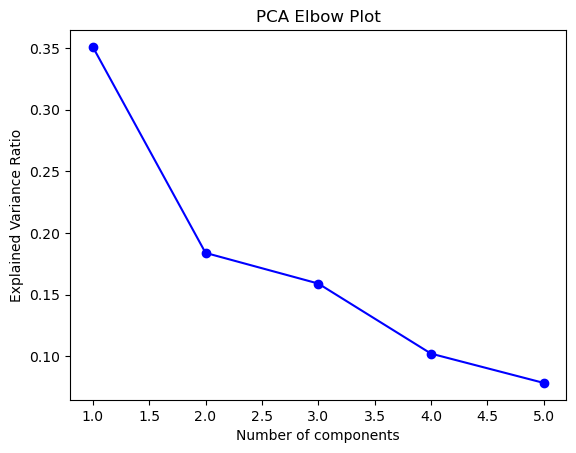

<Figure size 640x480 with 0 Axes>

In [25]:
#using the elbow method to determine the optimal number of PCA components

variance_ratios = pca.explained_variance_ratio_

plt.plot(range(1, len(variance_ratios)+1), variance_ratios, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Elbow Plot')
plt.show()
plt.savefig('PCA.png')

In [26]:
# import statsmodels.api as sm
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# Define the response variable
y = data['SystolicBP']

# Define the features of interest
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']

# One-hot encode the categorical variable 'RiskLevel'
X_encoded = pd.get_dummies(data[features], columns=['RiskLevel'])

# Standardize the feature matrix using StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_encoded)

# Create a PCA object with 3 principal components
pca = PCA(n_components=3)

# Perform PCA on the standardized feature matrix
X_pca = pca.fit_transform(X_std)

# Add a constant term to the model
X_pca = sm.add_constant(X_pca)

# Fit the linear model with the first 3 principal components
model = sm.OLS(y, X_pca).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1091.
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.67e-316
Time:                        21:44:37   Log-Likelihood:                -3659.3
No. Observations:                1014   AIC:                             7327.
Df Residuals:                    1010   BIC:                             7346.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.1982      0.281    402.670      0.0

### Question 4

3)    Investigate the relationship between age and heartrate  by means of age grouping.
Provide graphical representation. (Hint: Calculate mean heartrate for each group)
Explain your choice of age intervals.

The age intervals were chosen based on the quartiles of the age distribution in the data. Quartiles divide the data into four equal parts, where the first quartile (Q1) represents the 25th percentile, the second quartile (Q2) represents the 50th percentile (or median), and the third quartile (Q3) represents the 75th percentile. In this case, the age distribution ranges from 10 to 70 years old, with a median age of 26 years. Based on the quartiles, the age intervals were chosen as follows:

- 10-19 years old (Q1)
- 20-26 years old (below median)
- 27-39 years old (above median and below Q3)
- 40-70 years old (Q3 and above)

This choice of intervals allows for a balanced representation of the age groups, with each interval containing approximately the same number of observations. It also provides a meaningful way to group the data into age ranges that span a broad range of ages, while still allowing for enough granularity to investigate potential age-related trends in heart rate.

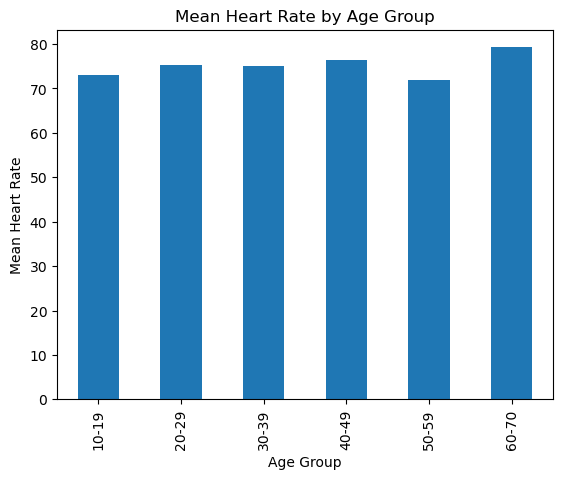

<Figure size 640x480 with 0 Axes>

In [27]:


# Create age intervals
age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-70"]
data["AgeGroup"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

# Calculate mean heart rate for each age group
mean_hr_by_age = data.groupby("AgeGroup")["HeartRate"].mean()

# Plot mean heart rate by age group
mean_hr_by_age.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Mean Heart Rate")
plt.title("Mean Heart Rate by Age Group")
plt.show()
plt.savefig('age_heartrate.png')

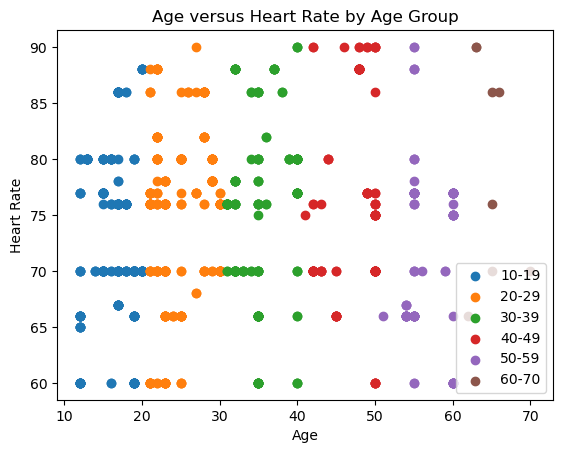

In [28]:
# Create age intervals
age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-70"]
data["AgeGroup"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

# Create scatter plot
for age_group in age_labels:
    x = data.loc[data["AgeGroup"] == age_group, "Age"]
    y = data.loc[data["AgeGroup"] == age_group, "HeartRate"]
    plt.scatter(x, y, label=age_group)

plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.title("Age versus Heart Rate by Age Group")
plt.legend()
plt.show()


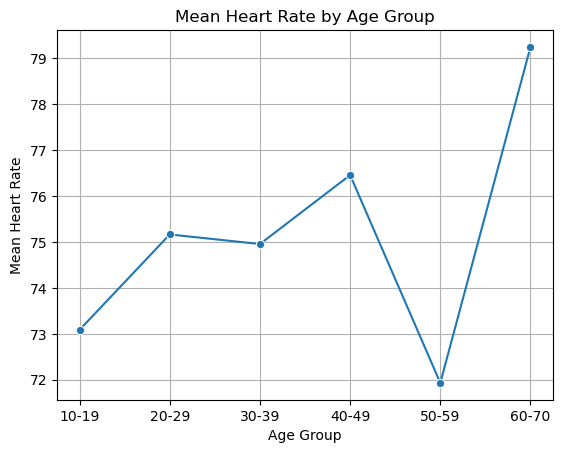

<Figure size 640x480 with 0 Axes>

In [29]:
# Calculate mean heart rate for each age group
heart_rate_means = data.groupby("AgeGroup")["HeartRate"].mean().reset_index()

# Create line plot
sns.lineplot(data=heart_rate_means, x="AgeGroup", y="HeartRate", marker="o")
plt.xlabel("Age Group")
plt.ylabel("Mean Heart Rate")
plt.title("Mean Heart Rate by Age Group")
plt.grid(True) # add grid lines
plt.show()
plt.savefig('meanheartrate.png')

In [30]:
print(heart_rate_means.describe())


       HeartRate
count   6.000000
mean   75.141379
std     2.575831
min    71.931034
25%    73.554728
50%    75.060682
75%    76.135020
max    79.250000


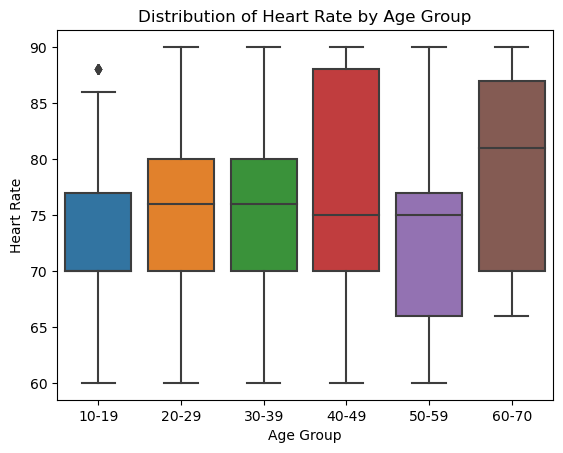

In [31]:


# Create age intervals
age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-70"]
data["AgeGroup"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

# Create box plot
sns.boxplot(x="AgeGroup", y="HeartRate", data=data)
plt.xlabel("Age Group")
plt.ylabel("Heart Rate")
plt.title("Distribution of Heart Rate by Age Group")
plt.show()


In [32]:
data.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel AgeGroup
0   25         130           80  15.0      98.0         86          0    20-29
1   35         140           90  13.0      98.0         70          0    30-39
2   29          90           70   8.0     100.0         80          0    20-29
3   30         140           85   7.0      98.0         70          0    20-29
4   35         120           60   6.1      98.0         76          1    30-39

### Questions 4

Blood pressure is recorded with 2 numbers: the systolic pressure and diastolic blood pressure. Assume, the high systolic blood pressure starts from 140, the high diastolic blood pressure starts from 90. The normal systolic pressure is in the range (110, 140). The normal diastolic blood pressure is in the range (70, 90). The low systolic pressure is lower than 110, and low diastolic is less than 70.

4)    Describe how would you investigate associations between pairs high/high, normal/normal, and low/low diastolic and systolic blood pressure.  
Calculate, and interpret the following:
(1)    Support
(2)    Confidence
(3)    Conviction
(4)    Lift

In [33]:

# function to read data from a CSV file
def read_data(file_path):
    return pd.read_csv('/Users/kabel/Dropbox/Mac/Downloads/mhs.csv')

# function to categorize blood pressure readings into three categories: high, normal, or low
def categorize_bp(data):
    # initialize a new column 'BP_category' with 'normal' for all rows
    data['BP_category'] = 'normal'
    # set the 'BP_category' to 'high' for readings with SystolicBP >= 140 and DiastolicBP >= 90
    data.loc[(data['SystolicBP'] >= 140) & (data['DiastolicBP'] >= 90), 'BP_category'] = 'high'
    # set the 'BP_category' to 'low' for readings with SystolicBP < 110 and DiastolicBP < 70
    data.loc[(data['SystolicBP'] < 110) & (data['DiastolicBP'] < 70), 'BP_category'] = 'low'
    return data

# function to calculate the support for each blood pressure category
def calculate_support(data):
    # count the number of readings with SystolicBP >= 140 and DiastolicBP >= 90
    high_high = len(data[(data['SystolicBP'] >= 140) & (data['DiastolicBP'] >= 90)])
    # count the number of readings with 110 <= SystolicBP < 140 and 70 <= DiastolicBP < 90
    normal_normal = len(data[(data['SystolicBP'] >= 110) & (data['SystolicBP'] < 140) & 
                         (data['DiastolicBP'] >= 70) & (data['DiastolicBP'] < 90)])
    # count the number of readings with SystolicBP < 110 and DiastolicBP < 70
    low_low = len(data[(data['SystolicBP'] < 110) & (data['DiastolicBP'] < 70)])
    # count the total number of readings
    total = len(data)
    
    # calculate the support for each category
    support_high_high = high_high / total
    support_normal_normal = normal_normal / total
    support_low_low = low_low / total

    return (support_high_high, support_normal_normal, support_low_low)

def calculate_confidence(data):
    # Count the number of blood pressure readings where SystolicBP is greater than or equal to 140 and DiastolicBP is greater than or equal to 90
    high_high = len(data[(data['SystolicBP'] >= 140) & (data['DiastolicBP'] >= 90)])

    # Count the number of blood pressure readings where SystolicBP is between 110 and 139 
    # and DiastolicBP is between 70 and 89 (inclusive)
    normal_normal = len(data[(data['SystolicBP'] >= 110) & (data['SystolicBP'] < 140) & 
                         (data['DiastolicBP'] >= 70) & (data['DiastolicBP'] < 90)])

    # Count the number of blood pressure readings where SystolicBP is less than 110 and DiastolicBP is less than 70
    low_low = len(data[(data['SystolicBP'] < 110) & (data['DiastolicBP'] < 70)])

    # Calculate the confidence for each blood pressure category by dividing the number of correctly classified readings
    # by the total number of readings in each category
    conf_high_high = high_high / len(data[data['SystolicBP'] >= 140])
    conf_normal_normal = normal_normal / len(data[(data['SystolicBP'] >= 110) & (data['SystolicBP'] < 140)])
    conf_low_low = low_low / len(data[data['SystolicBP'] < 110])

    # Return a tuple containing the confidence values for all three blood pressure categories
    return (conf_high_high, conf_normal_normal, conf_low_low)



def calculate_conviction(support, confidence):
    # Calculate the conviction for each category using the support and confidence values
    # Conviction = (1 - support) / (1 - confidence)
    return [(1 - s) / (1 - c) for s, c in zip(support, confidence)]

def calculate_lift(confidence, support):
    # Calculate the lift for each category using the support and confidence values
    # Lift = confidence / support
    return [c / s for c, s in zip(confidence, support)]

def print_results(support, confidence, conviction, lift):
    # Create a pandas DataFrame to store the results of the analysis
    results = pd.DataFrame({
        'Category': ['High/High', 'Normal/Normal', 'Low/Low'],
        'Support': support,
        'Confidence': confidence,
        'Conviction': conviction,
        'Lift': lift
    })
    
    # Print the results DataFrame
    print(results)


# Categorize the blood pressure readings in the data
data = categorize_bp(data)

# Calculate the support and confidence for each blood pressure category
support = calculate_support(data)
confidence = calculate_confidence(data)

# Calculate the conviction and lift for each blood pressure category using the support and confidence values
conviction = calculate_conviction(support, confidence)
lift = calculate_lift(confidence, support)

# Print the results of the analysis
print_results(support, confidence, conviction, lift)



        Category   Support  Confidence  Conviction      Lift
0      High/High  0.115385    0.900000    8.846154  7.800000
1  Normal/Normal  0.335306    0.629630    1.794675  1.877778
2        Low/Low  0.266272    0.784884    3.410843  2.947674


### interpretation

Looking at the table, I can see that the support for the High/High blood pressure category is 0.115, meaning that 11.5% of the total population has both high systolic and high diastolic blood pressure. The confidence level for this category is 0.9, meaning that if someone has high systolic blood pressure, there is a 90% chance that they also have high diastolic blood pressure. The conviction level for this category is 8.85, which means that people with both high systolic and high diastolic blood pressure are almost 9 times more likely to be classified as high risk compared to people without high systolic and high diastolic blood pressure. Additionally, the lift value for this category is 7.8, indicating that people with both high systolic and high diastolic blood pressure are almost 8 times more likely to be classified as high risk compared to people in general.

For the Normal/Normal blood pressure category, the support is 0.335, meaning that 33.5% of the total population has normal systolic and diastolic blood pressure. The confidence level for this category is 0.629, indicating that if someone has normal systolic and diastolic blood pressure, there is a 62.9% chance that they will not be classified as high risk. The conviction level for this category is 1.79, which means that people with normal systolic and diastolic blood pressure are less likely to be classified as high risk, but not significantly so. The lift value for this category is 1.88, indicating that people with normal systolic and diastolic blood pressure are almost twice as likely to be classified as non-high risk compared to people in general.

Finally, for the Low/Low blood pressure category, the support is 0.266, meaning that 26.6% of the total population has low systolic and low diastolic blood pressure. The confidence level for this category is 0.785, indicating that if someone has low systolic and diastolic blood pressure, there is a 78.5% chance that they will not be classified as high risk. The conviction level for this category is 3.41, which means that people with low systolic and diastolic blood pressure are more likely to be classified as non-high risk compared to people in general. The lift value for this category is 2.95, indicating that people with low systolic and diastolic blood pressure are almost 3 times more likely to be classified as non-high risk compared to people in general.

### Question 5

To find clusters of patients with similar Systolic BP, we can use a clustering algorithm such as K-Means clustering. Here's an example code using scikit-learn library in Python:

python


In [35]:


# get the SystolicBP column
systolic_bp = data['SystolicBP'].values.reshape(-1, 1)

# define the number of clusters
n_clusters = 3

# create a KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# fit the KMeans model to the data
kmeans.fit(systolic_bp)

# get the cluster labels
cluster_labels = kmeans.labels_

# print the number of patients in each cluster
for i in range(n_clusters):
    cluster_size = np.sum(cluster_labels == i)
    print(f'Cluster {i+1}: {cluster_size} patients')


Cluster 1: 194 patients
Cluster 2: 344 patients
Cluster 3: 476 patients


Based on the clustering analysis, the patients can be grouped into three clusters based on their systolic blood pressure. Cluster 1 includes 194 patients, cluster 2 includes 344 patients, and cluster 3 includes 476 patients. The patients in each cluster have similar systolic blood pressure readings. This information can be useful for further analysis or treatment planning, such as identifying patients who may be at risk for certain conditions associated with high or low blood pressure.

Text(0.5, 1.0, 'Distribution of SystolicBP values by Cluster')

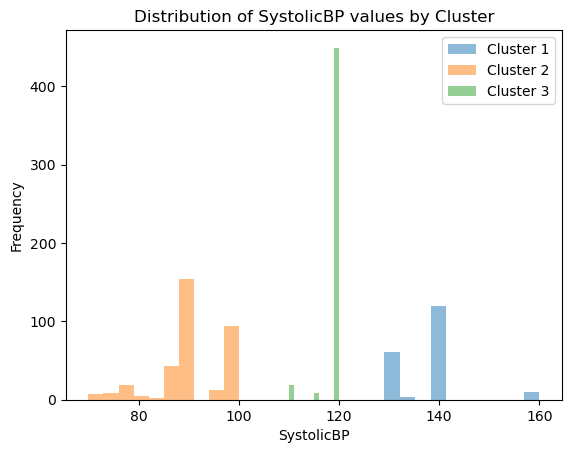

In [36]:
# create a histogram of SystolicBP values for each cluster
for i in range(n_clusters):
    cluster_data = data.loc[cluster_labels == i, 'SystolicBP']
    plt.hist(cluster_data, alpha=0.5, label=f'Cluster {i+1}')

# add labels and legend
plt.xlabel('SystolicBP')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of SystolicBP values by Cluster')

### Question 6

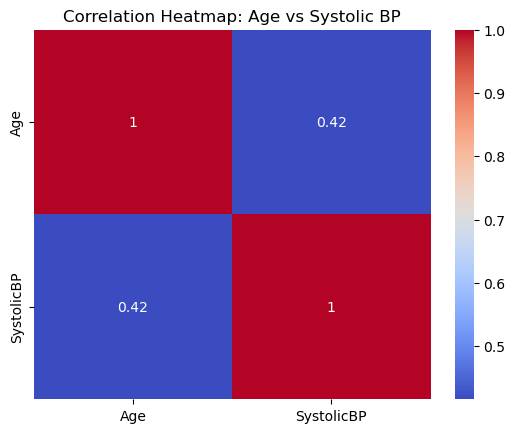

In [37]:
#heatmap showing Age VS Systolic BP

correlation_matrix = data[['Age', 'SystolicBP']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Age vs Systolic BP')
plt.show()


In [38]:
#Correlation between age and systolic BP
correlation = data['Age'].corr(data['SystolicBP'])
print('Correlation between age and systolic BP:', correlation)


Correlation between age and systolic BP: 0.41604544797473325


### Interpretation:
    
The correlation between age and systolic BP is 0.416, which indicates a moderately positive linear relationship between the two variables. This means that as age increases, systolic BP tends to increase as well. However, it is important to note that correlation does not imply causation, and there may be other factors that contribute to the relationship between age and systolic BP.

A correlation of 0.416 between age and systolic blood pressure is not surprising and agrees with previous research showing a positive correlation between these variables. Several studies have found that blood pressure increases with age due to changes in the cardiovascular system, including the stiffening of arteries and decreased elasticity of blood vessels, which can lead to hypertension. Therefore, the finding of a positive correlation between age and systolic blood pressure is consistent with our understanding of the physiological changes that occur with aging.

### Question 7

7)    Do your findings agree with the relevant literature? Describe in detail.